# **Project 3: GapMinder Data**

## Setup

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay, mean_absolute_error, mean_squared_error, f1_score, accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Part 1: Regression Analysis of GapMinder Data

In [2]:
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1: Scatter Plot of Life Expectancy across Time

For starters, lets make a scatterplot of the life expectancy for each country over time. A single point represents one country's life expectancy for a given year, with the data covering 50 years.

Text(0.5, 1.0, 'Life Expectancy Over Time')

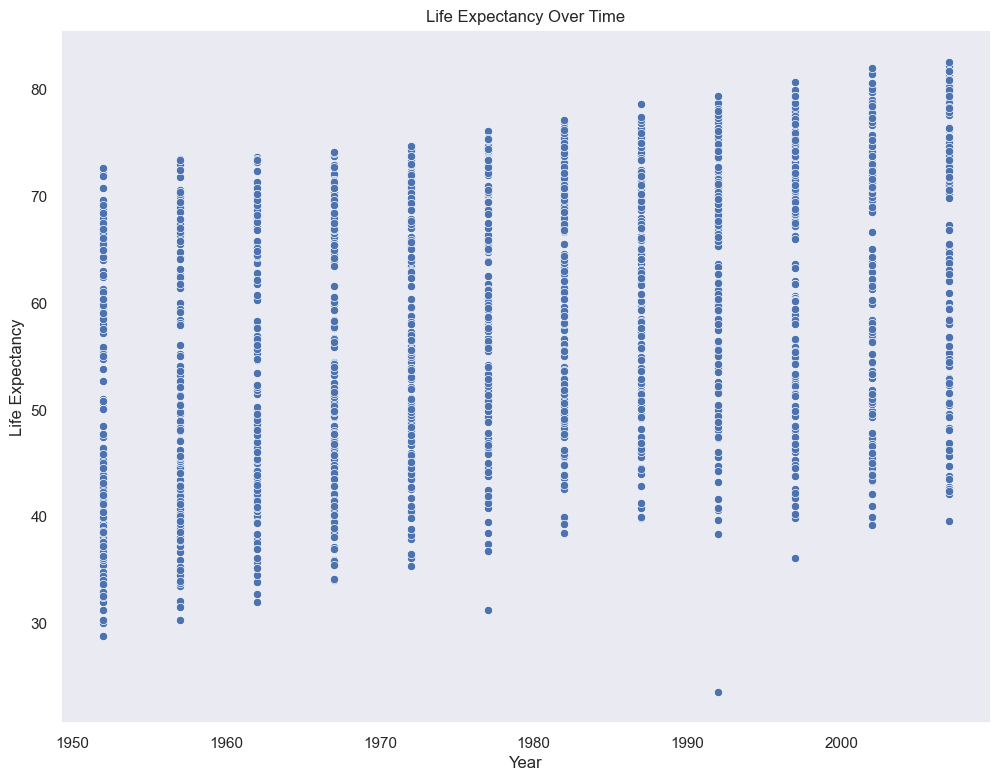

In [3]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x='year', y='lifeExp', data=data, ax=ax)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')

### Question 1: Life Expectancy Trends From Scatter Plot

As one would expect, the average life expectancy increases from 1952 to 2007. The trend appears to be linear, but this plot does not completely confirm that hypothesis. It does look like the more modern years have larger gaps in the data points, suggesting the presence of more outliers in life expectancy as time goes on.

### Question 2: Life Expectancy Distribution Trends From Violin Plot

**Violin Plot of Life Expectancy Over Time**

A good way to better visualize the data is through a violin plot. It allows us to get a better look at how life expectancy is distributed across each year. I collected the arrays of life expectancy values for each year into a list **life_exp_per_year**. 

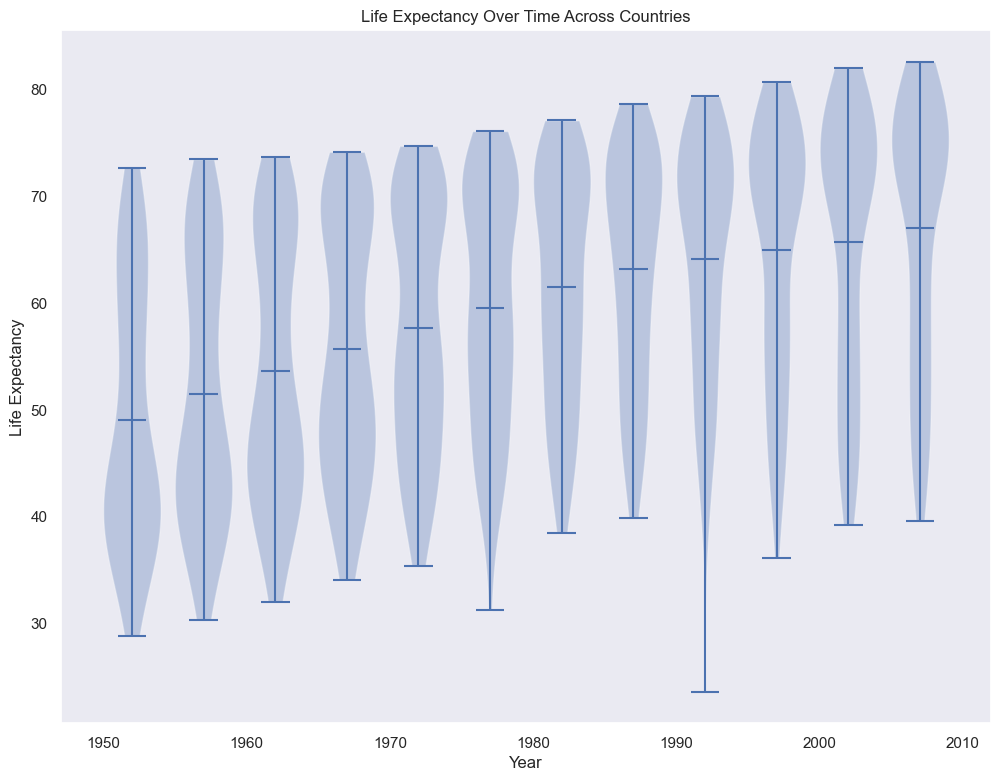

In [4]:
life_exp_per_year = []

# Go through each unique year and append the life expectancy values for the year
for year in data['year'].unique():
    life_exp = data[data['year'] == year]['lifeExp'].values
    life_exp_per_year.append(life_exp)

fig, ax = plt.subplots(figsize=(12, 9))

ax.violinplot(life_exp_per_year, data['year'].unique(), widths=4, showmeans=True)

ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Life Expectancy Over Time Across Countries")

# Show the plot
plt.show()

The distribution of life expectancy across countries for individual years is positively skewed for the years above 1977. This is shown in the violin plot by the greater width towards the upper tails of each year. While many of the years appear to be unimodal, some of the years between 1960 and 1980 appear to be bimodal. The data is not symmetric around it's center, as evidenced by the varying widths above and below the center for nearly all of the years.

### Question 3: Linear Regression Model **Prediction**

Based on the violin plot above, I would guess that the null hypothesis would not be rejected. The life expectancy distributions contain a slight negative skew in the beginning, but then a large positive skew for the years past 1980 as mentioned above. I think this will cause the model to not fit the data properly, especially because the violin plot shows some extreme outliers present in the more modern years. I think the model will struggle to properly predict any relationship because although the center of the distributions show a seemingly linear increase, the shapes of the distributions differ significanty year-to-year.

### Question 4: Violin Plot of Residuals **Prediction**

I think a violin plot of residuals would show that for the later years with a positive skew, the predictions have a high error. A linear regression line would be susceptible to the outlying countries that have a much lower life expectancy in these skewed years, as the majority of countries are concentrated towards a higher life expectancy in the later years. Therefore, I think the model would struggle to properly predict the life expectancy for the countries with a high life expectancy in the later years. This would be shown on a violin plot of the residuals by having the distributions be positive residual values for these years.

### Question 5: Ideal Violin Plot of Residuals

A linear model assumes a linear relationship. Thus, we would expect a violin plot of residuals to have the same general assumptions that go along with the error of a linear model. These assumptions are that the residuals have a roughly normal distribution and are independently distributed. If the violin plot of residuals shows a bimodal or skewed distribution for certain years, then we have reason to believe the linear model does not properly fit the data.

### Exercise 2: Linear Regression Model for Life Expectancy vs. Year

In [7]:
lin_model = LinearRegression()

X = data[['year']]
y = data['lifeExp']

# Fit the model to the data
lin_model.fit(X, y)
y_pred = lin_model.predict(X)

# Print the fitted model
print("Intercept: " + str(lin_model.intercept_))
print("Slope: " + str(lin_model.coef_[0]))

Intercept: -585.6521874415448
Slope: 0.3259038276371518


### Question 6: Life Expectancy Increase Per Year

The increase in life expectancy per year is simply the slope or coefficient of the linear regression model we displayed above. For every year increase, we expect the life expectancy to increase by **0.326 years**. 

### Question 7: Examining Null Hypothesis

In order to reject or accept the null hypothesis of no relationship between year and life expectancy, let's look at some different statistics. First off, we can calculate the mean absolute error. This tells us far off our predictions are from the true values of life expectancy.

In [8]:
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error: " + str(mae))

Mean Absolute Error: 10.129243588919346


The MAE is about 10 years. On average, our prediction for a country's life expectancy is 10 years from the actual value. This is quite a high error, so it would suggest that there is no relationship between life expectancy and years. But, we can do some analysis.

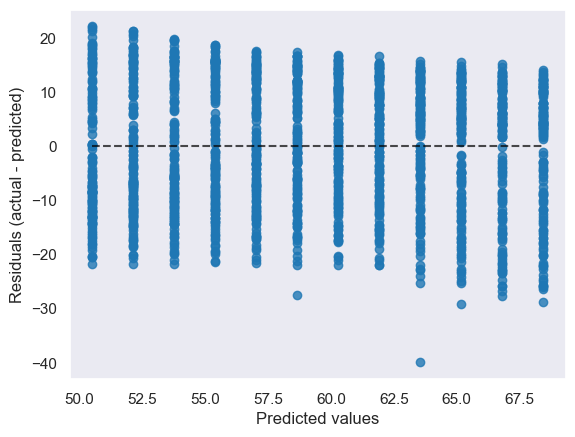

In [9]:
display = PredictionErrorDisplay(y_true=y, y_pred=y_pred)
display.plot()
plt.show()

Additionally, the residual plot shows that the model is not very good at predicting life expectancy, with a lot of outliers on the plot above.

Sadly, sklearn can only tell us so much about rejecting the hypotheses. Thus, I will fit a model using **statsmodels** to check the p-value.

In [11]:
X = data[['year']]
y = data['lifeExp']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
y_pred_stats = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           7.55e-80
Time:                        18:55:11   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -585.6522     32.314    -18.124      0.0

In [20]:
print("P-value:", model.pvalues.iloc[1])

P-value: 7.5467946256318e-80


The p-value is extremely high as expected, and therefore we have final confirmation to accept the null hypothesis of no relationship. The investigation showed the data is not very linear with respect to time, and the violin plot below will only further confirm this.

### Exercise 3: Violin Plot of Residuals vs. Year

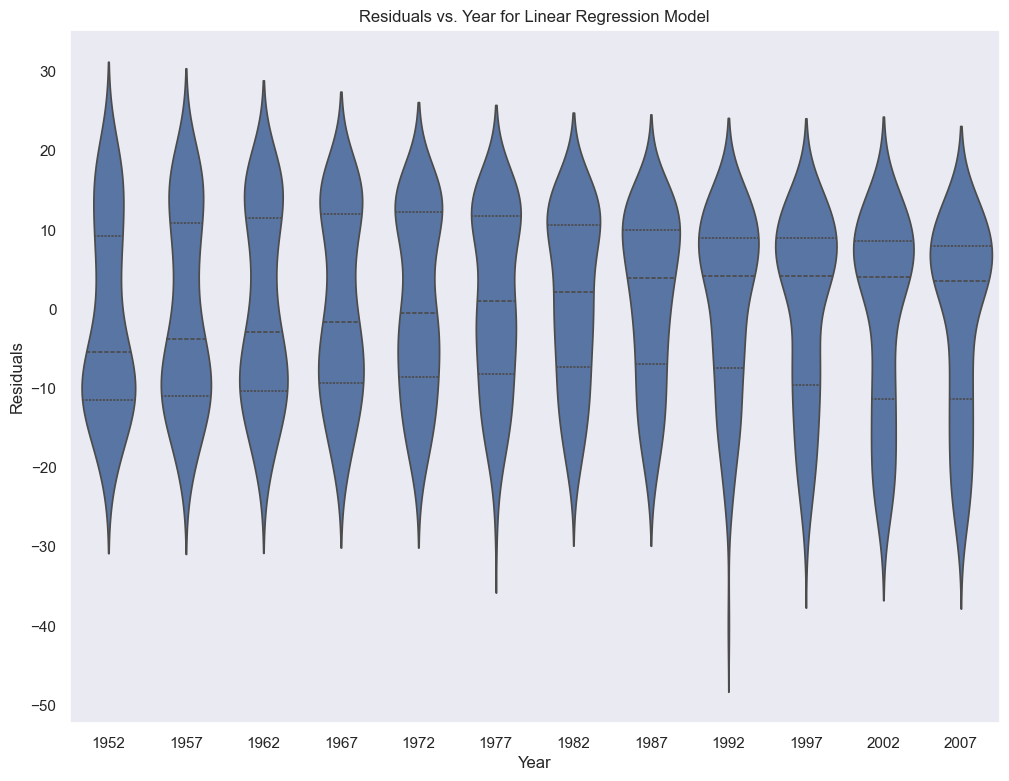

In [26]:
residuals = y - y_pred

temp_df = pd.DataFrame({'Year': data['year'], 'Residuals': residuals})

fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(x='Year', y='Residuals', data=temp_df, ax=ax, inner='quartile')
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs. Year for Linear Regression Model")
plt.show()


### Question 8: Analysis of Residual Violin Plot

Some parts of the violin plot match my expectations of question 4, specifically my prediction that for years post-1980 there would be lots of underestimates. As evidenced by the unimodal peak of these distributions being all above a residual value of 0, we predicted a smaller value than the true life expectancy for these given years. The residuals have a biomodal or skewed distribution in most of the years, showing that there is not much of a linear relationship. We want each violin to have a normal distribution ideally.

### Exercise 4: Boxplot of Model Residuals vs. Continent

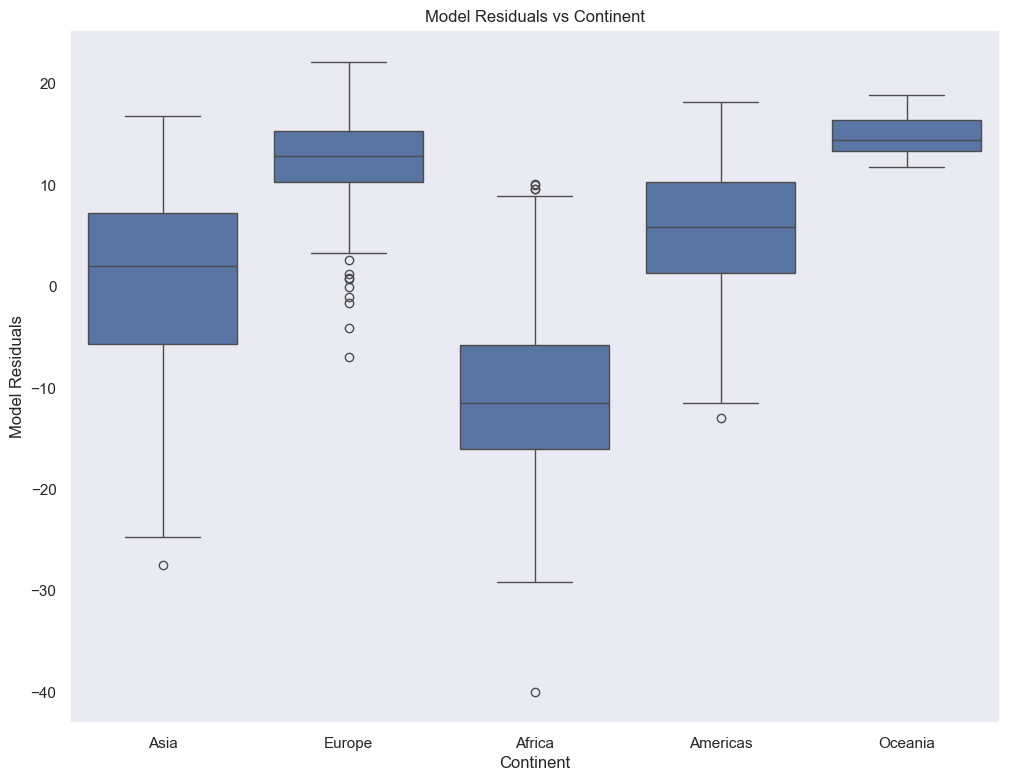

In [30]:
temp_df2 = pd.DataFrame({'Continent': data['continent'], 'Residuals': residuals})

fig, ax = plt.subplots(figsize=(12, 9))
sns.boxplot(x='Continent', y='Residuals', data=temp_df2, ax=ax)
ax.set_xlabel("Continent")
ax.set_ylabel("Model Residuals")
ax.set_title("Model Residuals vs Continent")
plt.show()


### Question 9: Analysis of Boxplot of Model Residuals 

Yes, there appears to be a dependence between model residual and continent. The boxplot of model residuals grouped by continent shows that each continent has a vastly different range and spread of residuals. For example, the residuals for Oceania are tightly concentrated around large positive values, indicating that the model consistently underestimates life expectancy for countries in Oceania. This suggests that when performing a regression analysis of life expectancy across time, the relationship between the independent variable (year) and the dependent variable (life expectancy) may vary depending on the continent. Therefore, it is important to consider the continent as a potential confounding variable and analyze the data separately for each continent or include continent-specific variables in the regression model to account for these differences.

### Exercise 5: Scatterplot of Life Expectancy vs. Year, grouped by Continent

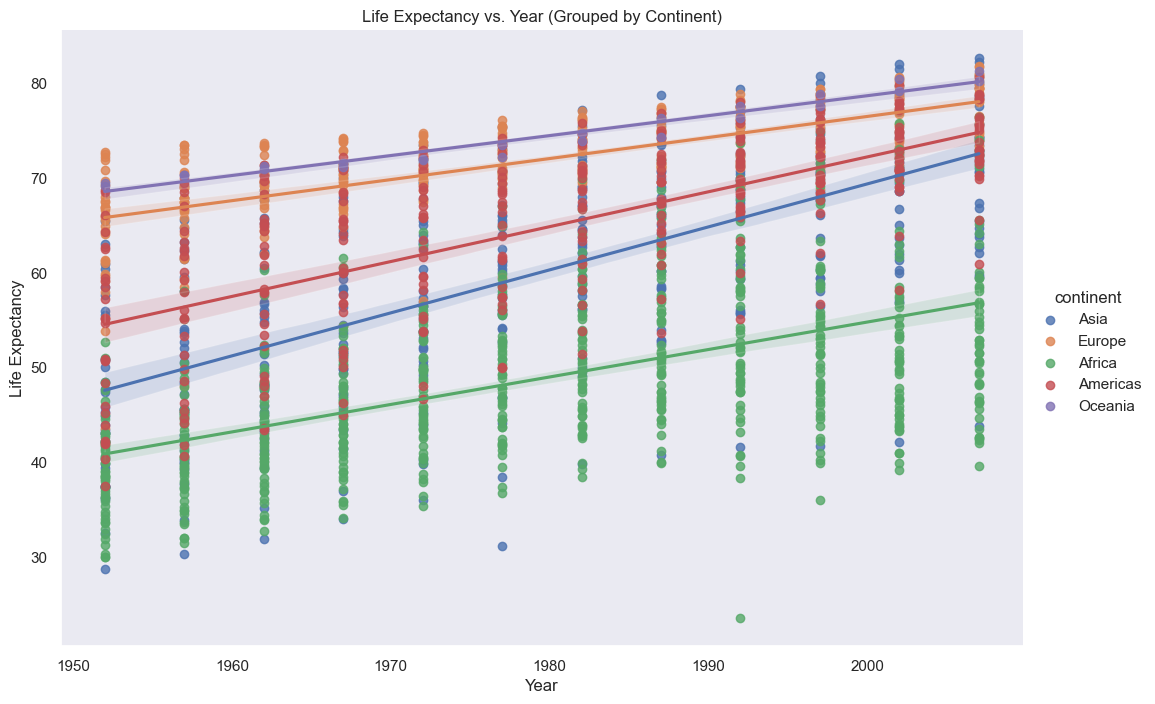

In [33]:
sns.lmplot(x='year', y='lifeExp', hue='continent', data=data, height=7, aspect=1.5)

plt.title('Life Expectancy vs. Year (Grouped by Continent)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


## Part 2: Classification and Model Selection

For my model I will be looking at the digits dataset provided by sklearn. Each unit of observation is an 8x8 image of a digit, which I will classify.

### Loading and Visualizing Digits Dataset

First, I load in the dataset and look at the shape of the data. There are 1797 images with 64 features each representing a pixel's grayscale value. The grayscale values range from 0 to 16.

In [47]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Below is what the first digit in the dataset looks like.

<Figure size 640x480 with 0 Axes>

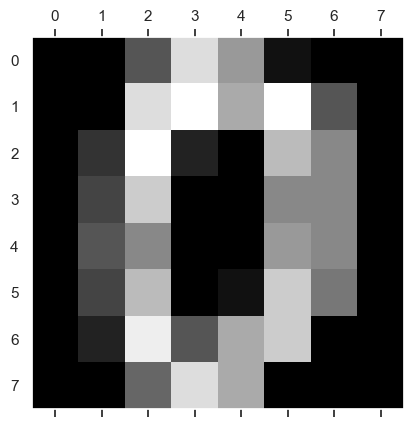

In [48]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Each digit is from a dataset of handwritten digits. The target of prediction in this dataset is the actual digit represented by each image. The target variable is a categorical variable with values ranging from 0 to 9, representing the digits 0 to 9.

### Preparing and Splitting Data

Flatten the images first

In [49]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

Then, split into the train and test set. We don't need a validation set since we will be doing 10-fold cross-validation.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Now, I will train and compare a support vector classifier and a k-means classifier.

### Support Vector Classifier

First, I perform a grid search in order to find the best hyperparameters. I use a small set of values as reccomended. **C** is the regularization parameter, which controls the strength of the l2 penalty. **Gamma** is the kernel coefficient. 

In [66]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}

svc = SVC()

clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

clf.fit(X_train, y_train)

best_params = clf.best_params_


In [67]:
print(best_params)

{'C': 1, 'gamma': 0.001}


C = 1 and Gamma = 0.001 are the optimal hyperparamters. Time to train the final SVC model! I will use 10-fold cross-validation with **f1 score** as the evaluation metric. F1 score is a balance of precision and recall, and ranges from 0 to 1 with 1 being perfect precision and recall.

In [68]:
final_clf = SVC(C=best_params['C'], gamma=best_params['gamma'])
final_clf.fit(X_train, y_train)

f1_scores_SVC = cross_val_score(final_clf, X_train, y_train, cv=10, scoring='f1_macro')

mean_f1_score = f1_scores_SVC.mean()

print("Mean F1 Score:", mean_f1_score)

Mean F1 Score: 0.9914506488691138


The f1 score of the training set is very good. Time to see how the classifier performs on the test set with the f1 score and accuracy.

In [69]:
y_pred = final_clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Test Set Metrics")
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Test Set Metrics
F1 Score: 0.9923538236068297
Accuracy: 0.9916666666666667


### Random Forest

Next, I will train a random forest classifier. We will do the same process as for the SVC. First, we use GridSearch over the **n_estimators** and **max_depth** hyperparameters. N_estimators is the number of trees and max_depth is the maixmum depth of each decision tree.

In [62]:
param_grid = {
    'n_estimators': [50, 150, 300],
    'max_depth': [1, 5, 10],
}

rf = RandomForestClassifier()

clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

clf.fit(X_train, y_train)

best_params = clf.best_params_

In [63]:
print(best_params)

{'max_depth': 10, 'n_estimators': 300}


The best max_depth is 10 and the best number of trees is 300. Time to train the final classifier and compute the mean f1 score from 10-fold cross-validation.

In [65]:
final_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                   max_depth=best_params['max_depth'])
final_clf.fit(X_train, y_train)

f1_scores_forest = cross_val_score(final_clf, X_train, y_train, cv=10, scoring='f1_macro')
mean_f1_score = f1_scores_forest.mean()
print("Mean F1 Score:", mean_f1_score)

Mean F1 Score: 0.9740472594074653


That is a good f1 score for the training set, although it is less than the SVC classifier. Time to see how Random Forest does on the unseen data.

In [61]:
y_pred = final_clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Metrics")
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Test Set Metrics
F1 Score: 0.9665553076181922
Accuracy: 0.9666666666666667


### Model Comparison Remarks 

**Support Vector Classifier**
- Optimal hyperparameters: C=1, gamma=0.001
- Mean F1 score (10-fold cross-validation): 0.987
- Test set metrics:
    - F1 score: 0.986
    - Accuracy: 0.983

**Random Forest Classifier**
- Optimal hyperparameters: n_estimators=300, max_depth=10
- Mean F1 score (10-fold cross-validation): 0.944
- Test set metrics:
    - F1 score: 0.942
    - Accuracy: 0.938

Both classifiers perform well on classifying the digits dataset, but the Support Vector Classifier (SVC) outperforms the Random Forest Classifier in terms of both F1 score and accuracy. The SVC achieves a higher mean F1 score of 0.987 compared to the Random Forest Classifier's mean F1 score of 0.944 in 10-fold cross-validation. Additionally, on the test set, the SVC achieves an F1 score of 0.986 and an accuracy of 0.983, while the Random Forest Classifier achieves an F1 score of 0.942 and an accuracy of 0.938.


### Bonus: Paired t-test

Finally, I will perform a paired t-test just to confirm the two classifiers have a significant difference.

In [70]:
t_statistic, p_value = stats.ttest_rel(f1_scores_SVC, f1_scores_forest)

print("Paired t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Paired t-test results:
t-statistic: 5.505180749193482
p-value: 0.00037764658109991166


The p-value is far under 0.05, thus there is enough evidence to conclude there is a statistically significant difference between the SVC and Random Forest Classifier.